In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('..')

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from retrieve_wmf import get_redirects,retrieve_pageviews_per_article, retrieve_pageviews_for_articles, retrieve_edit_counts_edit_types_articles

In [4]:
article_vienna, article_kabul = '2020_Vienna_attack', '2020_Kabul_University_attack'

In [5]:
vienna_redirects, kabul_redirects = get_redirects(article_vienna, 'en'), get_redirects(article_kabul, 'en')

In [6]:
articles_vienna, articles_kabul = vienna_redirects + [article_vienna], kabul_redirects + [article_kabul]

In [7]:
start, end = 20201101, 20201101 + 30
pv_vienna, pv_kabul = retrieve_pageviews_for_articles(articles_vienna, 'en', start=20201101, end=20201201, agent='user'), retrieve_pageviews_for_articles(articles_kabul, 'en', start=20201101, end=20201201, agent='user')

In [8]:
pv_vienna_daily = pv_vienna.groupby('date')['views'].sum()
pv_kabul_daily = pv_kabul.groupby('date')['views'].sum()

In [9]:
pv_daily = pd.concat([pv_vienna_daily.rename('Vienna'), pv_kabul_daily.rename('Kabul')], axis=1)
pv_daily = pd.concat([pv_daily, pd.DataFrame([[0, 0]], columns=['Vienna', 'Kabul'], index=[pd.to_datetime('2020-11-01')])]).reset_index().rename(
    {'index': 'date'}, axis=1).sort_values('date')
pv_firstweek = pv_daily[(pv_daily.date <= '2020-11-08') & (pv_daily.date >= '2020-11-02')]
print(pv_firstweek.Vienna.sum(), pv_firstweek.Kabul.sum())

108695 72054


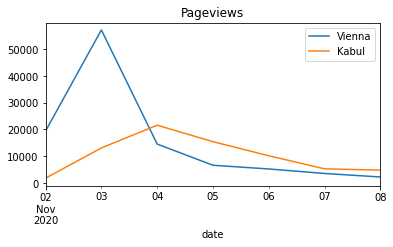

In [42]:
fig, ax = plt.subplots(figsize=(6, 3))
pv_firstweek.plot(x='date', title='Pageviews', ax=ax)
fig.savefig('fig1/fig1_pageviews.png', dpi=300, bbox_inches='tight')

In [11]:
edits_kabul = retrieve_edit_counts_edit_types_articles(articles_kabul, 'en', start=20201101, end=20201201)
edits_vienna = retrieve_edit_counts_edit_types_articles(articles_vienna, 'en', start=20201101, end=20201201)
edits_kabul_day = edits_kabul.groupby('date')['edits'].sum()
edits_vienna_day = edits_vienna.groupby('date')['edits'].sum()
edits_daily_user = pd.concat([edits_vienna_day.rename('Vienna'), edits_kabul_day.rename('Kabul')], axis=1).reset_index()
edits_firstweek = edits_daily_user[(edits_daily_user.date <= '2020-11-08') & (edits_daily_user.date >= '2020-11-02')]

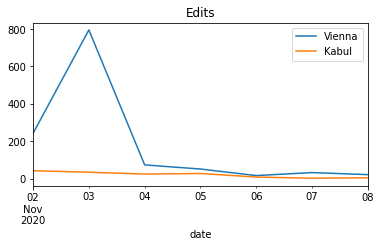

In [41]:
fig, ax = plt.subplots(figsize=(6, 3))
edits_firstweek.plot(x='date', title='Edits', ax=ax)
fig.savefig('fig1/fig1_edits.png', dpi=300, bbox_inches='tight')

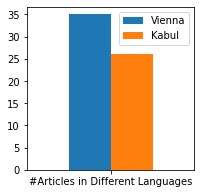

In [40]:
fig, ax = plt.subplots(figsize=(3, 3))
pd.DataFrame([[35, 26]], columns=['Vienna', 'Kabul'], index=['#Articles in Different Languages']).plot.bar(rot=0, ax=ax)
fig.savefig('fig1/hist_articles.png', dpi=300, bbox_inches='tight')

<AxesSubplot:xlabel='date'>

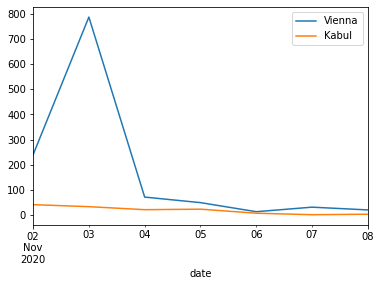

In [13]:
edits_kabul_user = retrieve_edit_counts_edit_types_articles(articles_kabul, 'en', start=20201101, end=20201201, edit_types=['user', 'anonymous'])
edits_vienna_user = retrieve_edit_counts_edit_types_articles(articles_vienna, 'en', start=20201101, end=20201201, edit_types=['user', 'anonymous'])
edits_kabul_day_user = edits_kabul_user.groupby('date')['edits'].sum()
edits_vienna_day_user = edits_vienna_user.groupby('date')['edits'].sum()
edits_daily_user = pd.concat([edits_vienna_day_user.rename('Vienna'), edits_kabul_day_user.rename('Kabul')], axis=1).reset_index()
edits_firstweek_user = edits_daily_user[(edits_daily_user.date <= '2020-11-08') & (edits_daily_user.date >= '2020-11-02')]
edits_firstweek_user.plot(x='date') # SEEMS NOT MUCH DIFFERENCE HERE!

<AxesSubplot:xlabel='date'>

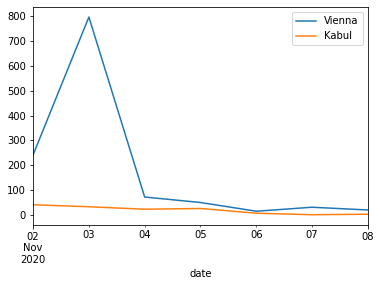

In [14]:
edits_firstweek.plot(x='date')